In [7]:
from WENO5 import WENO5_calc
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
k_m =1
delta_x=0.0001
# if params['weno']:
x =np.linspace(0,10,1000)
input = -np.arctan(x**2)*np.cos(x**2)
# input = np.sin(x)

time0 =time.time()
WENO_out=WENO5_calc(k_m, np.array(input), delta_x, eps = 1.0e-40, power=2)
time1 =time.time()

print("Time for WENO", time1-time0)

# WENO_out = WENO_out[0:-5]
# x_weno = x[0:-5]

Time for WENO 0.0007197856903076172


In [9]:
dL= delta_x
time0 =time.time()
built_in_out= np.gradient(input, edge_order=2)/dL 
time1 =time.time()
print("Time for Built-in", time1-time0)

Time for Built-in 0.0001327991485595703


In [10]:
print(np.shape(built_in_out))

(1000,)


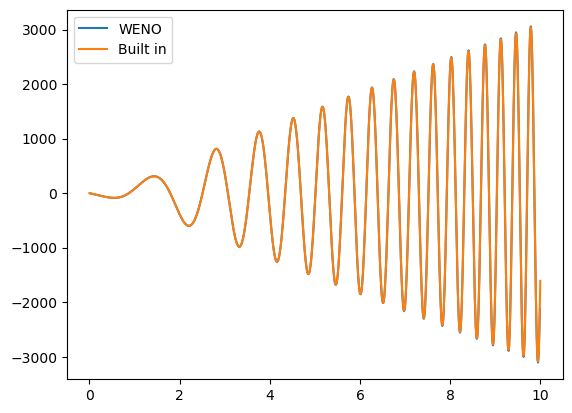

In [11]:
plt.plot(x,WENO_out, label ="WENO")
plt.plot(x,built_in_out, label = "Built in")
plt.legend()

last nums [-0.62564674 -0.70057766]


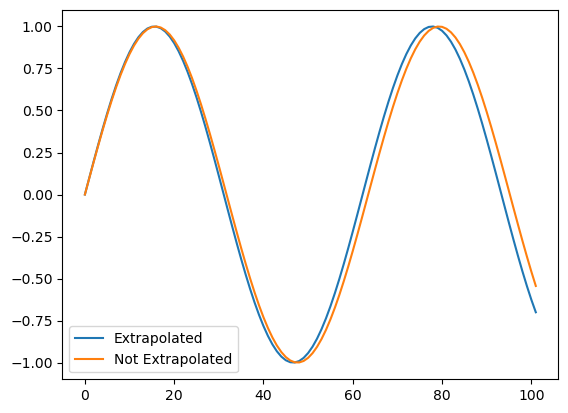

In [12]:

x =np.linspace(0,10,100)
input = np.sin(x)
last_nums= np.interp(np.array([8,9]),np.array([0,1,2,4,5,6,7]),input[-7:])
poly = np.polyfit(np.array([0,1,2,3,4,5,6,7]), input[-8:], deg=3)
last_nums = np.polyval(poly, np.array([8,9]))
print("last nums", last_nums)
input_len=len(input)
input = np.insert(input,input_len,last_nums)
plt.plot(input, label ="Extrapolated")


x =np.linspace(0,10,102)
input2 = np.sin(x)
plt.plot(input2, label= "Not Extrapolated")
plt.legend()